In [22]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import softmax

In [23]:
img = torch.load("cancer_ct.pt").cpu()
true_mask = torch.load("./true_mask.pt").cpu()
true_mask = softmax(true_mask)#*256

attn_mask = torch.load("./attn_mask.pt").cpu()
attn_mask = softmax(attn_mask)#*256

Text(0.5, 1.0, 'Ground Truth Localization')

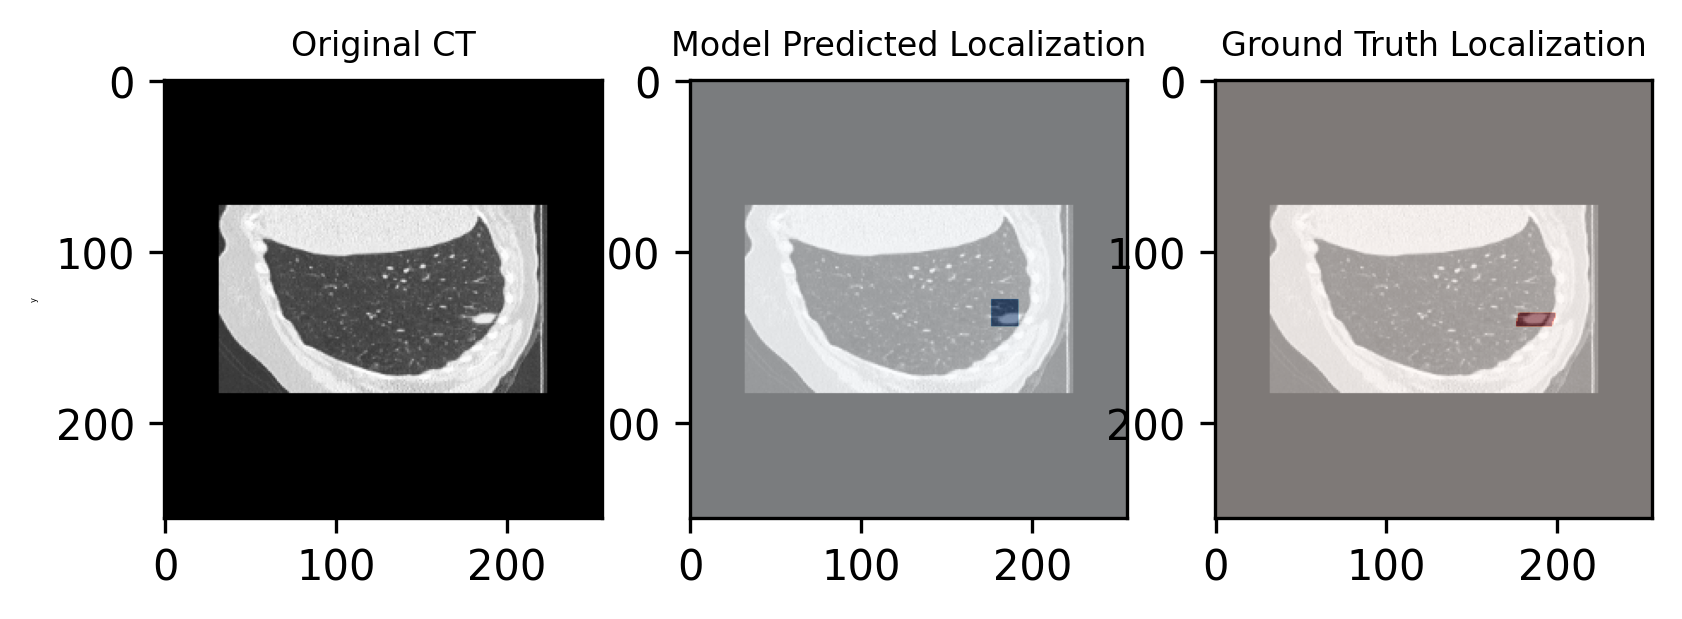

In [61]:
plt.figure(dpi=300)

plt.subplot(1, 3, 1)
plt.imshow(img[0][42], cmap='gray')
plt.gca().set_title("Original CT", fontsize=8)
plt.gca().set_ylabel('y', fontsize=2)

plt.subplot(1, 3, 2)
plt.imshow(img[0][42], cmap='gray')
plt.imshow(attn_mask[0][42], cmap= 'Blues', alpha=0.5)
plt.gca().set_title("Model Predicted Localization", fontsize=8)

plt.subplot(1, 3, 3)
plt.imshow(img[0][42], cmap='gray')
plt.imshow(true_mask[0][42], cmap='Reds', alpha=0.5)
plt.gca().set_title("Ground Truth Localization", fontsize=8)

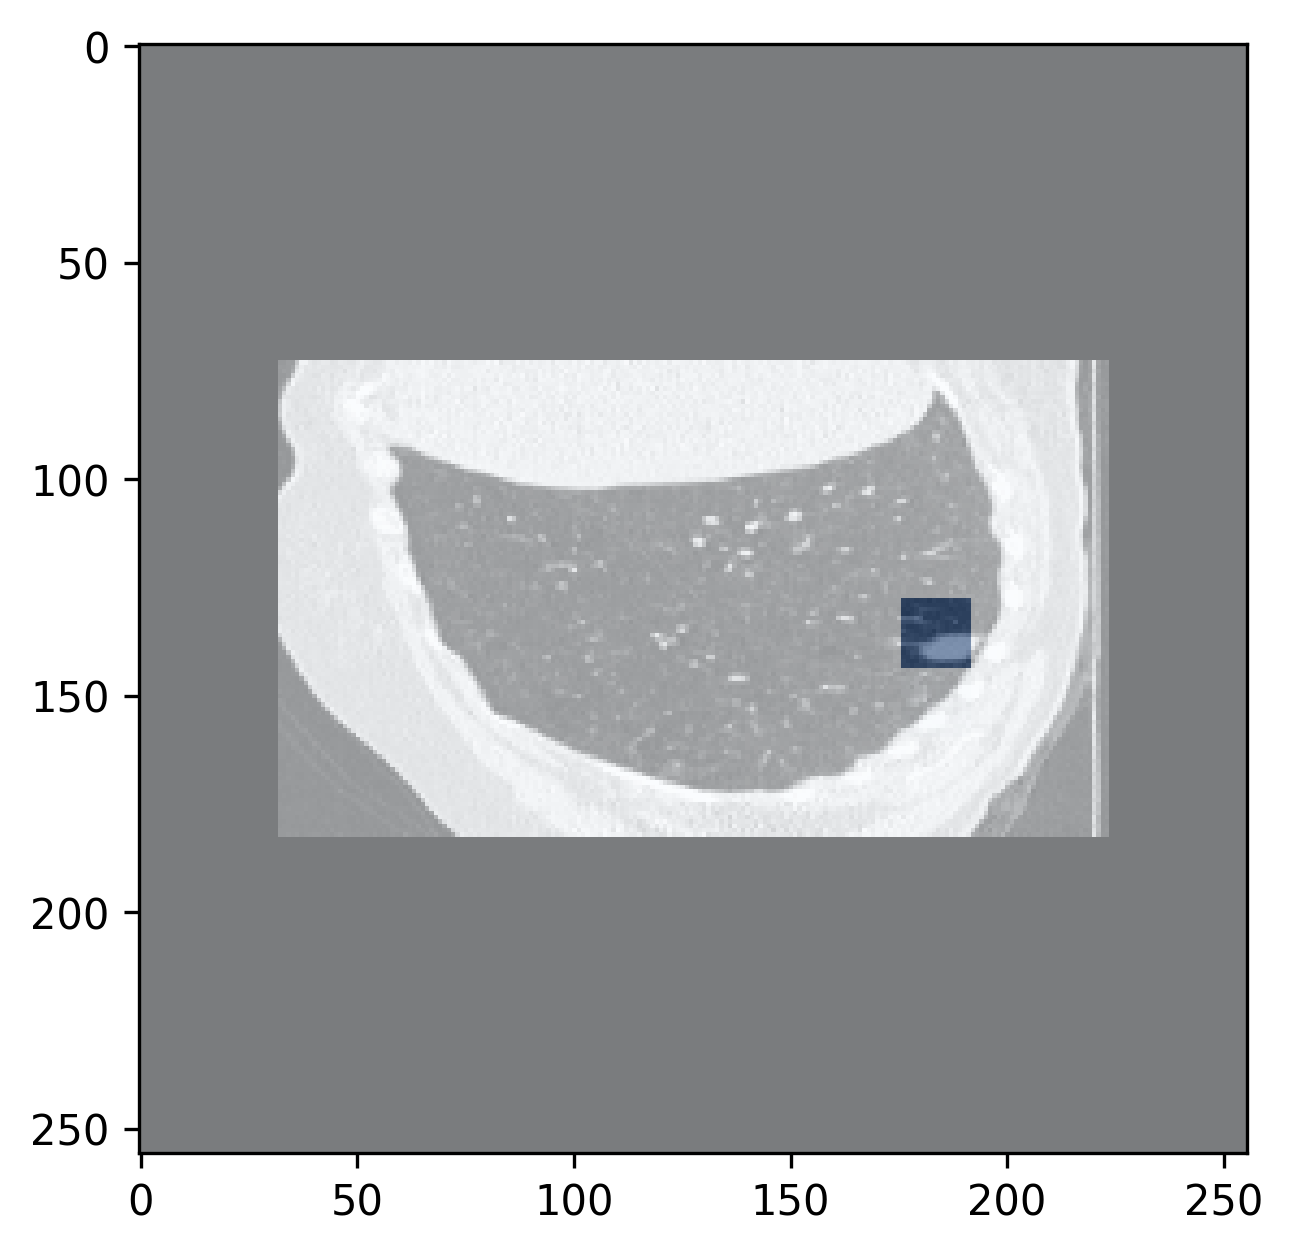

In [46]:
plt.figure(dpi=300)
plt.imshow(img[0][42], cmap='gray')
plt.imshow(attn_mask[0][42], cmap= 'Blues', alpha=0.5)

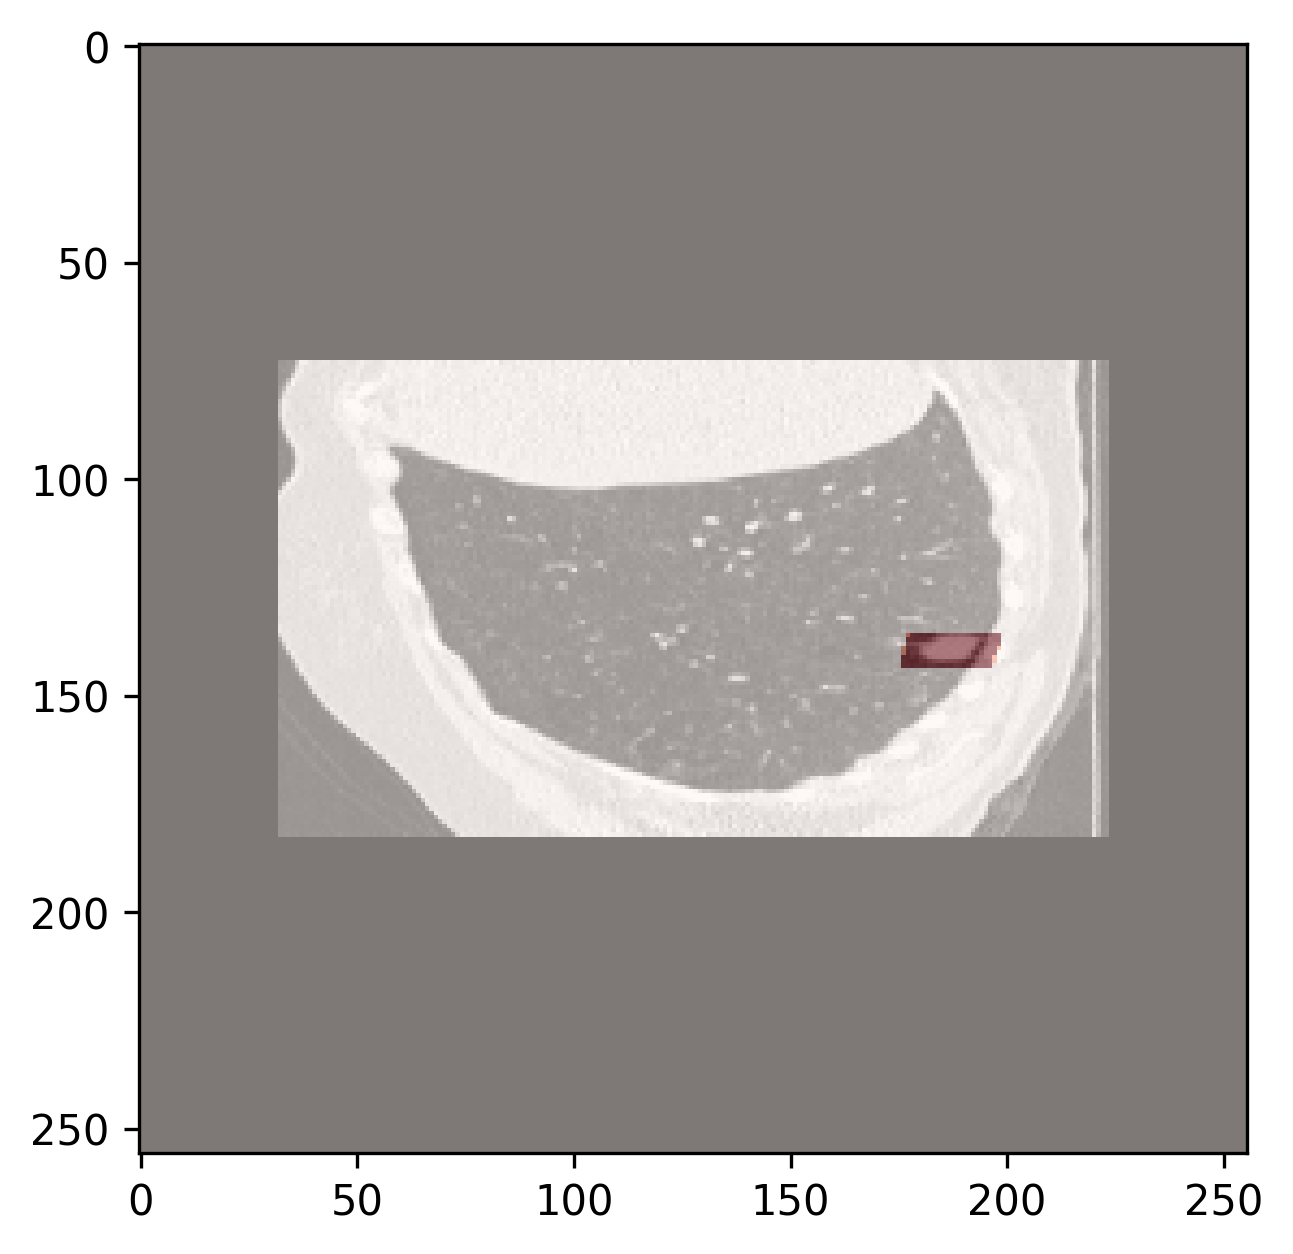

In [45]:
# plt.imshow(true_mask[0][42])
plt.figure(dpi=300)
plt.imshow(img[0][42], cmap='gray')
plt.imshow(true_mask[0][42], cmap='Reds', alpha=0.5)

In [5]:
attn_mask

array([[[[1.27005537e-102, 1.27005537e-102, 1.27005537e-102, ...,
          1.27005537e-102, 1.27005537e-102, 1.27005537e-102],
         [1.27005537e-102, 1.27005537e-102, 1.27005537e-102, ...,
          1.27005537e-102, 1.27005537e-102, 1.27005537e-102],
         [1.27005537e-102, 1.27005537e-102, 1.27005537e-102, ...,
          1.27005537e-102, 1.27005537e-102, 1.27005537e-102],
         ...,
         [1.27005537e-102, 1.27005537e-102, 1.27005537e-102, ...,
          1.27005537e-102, 1.27005537e-102, 1.27005537e-102],
         [1.27005537e-102, 1.27005537e-102, 1.27005537e-102, ...,
          1.27005537e-102, 1.27005537e-102, 1.27005537e-102],
         [1.27005537e-102, 1.27005537e-102, 1.27005537e-102, ...,
          1.27005537e-102, 1.27005537e-102, 1.27005537e-102]],

        [[1.27005537e-102, 1.27005537e-102, 1.27005537e-102, ...,
          1.27005537e-102, 1.27005537e-102, 1.27005537e-102],
         [1.27005537e-102, 1.27005537e-102, 1.27005537e-102, ...,
          1.27005537e-

In [8]:
img.shape

torch.Size([1, 200, 256, 256])

In [10]:
def multi_slice_viewer(volume):
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

TypeError: Invalid shape (200, 256, 256) for image data

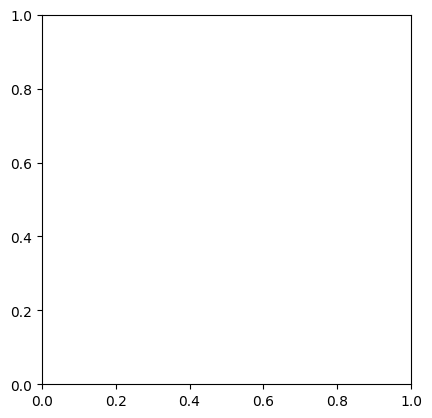

In [11]:
multi_slice_viewer(img)

ValueError: too many values to unpack (expected 3)

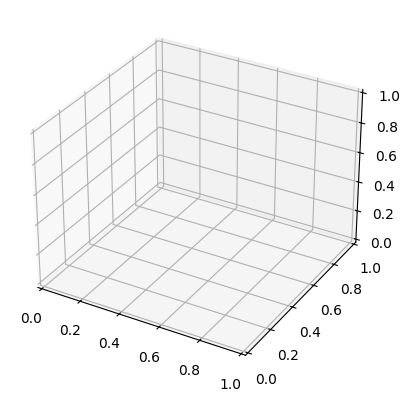

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z,x,y = img[0].nonzero()
ax.scatter(x, y, -z, zdir='z', c= 'red')

In [17]:
x = img[0].nonzero()

In [18]:
x[0].shape

torch.Size([3])